<a href="https://colab.research.google.com/github/juampe/jupyter/blob/main/El_perceptr%C3%B3n_ABBANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notas sobre modelo de perceptrón ABBANN <br>
"A Belated Builder of Artificial Neural Networks" de **José Félix García de la Torre Corral (jfelix.garcia@gmail.com)** <br>



## **1 El perceptrón belated**
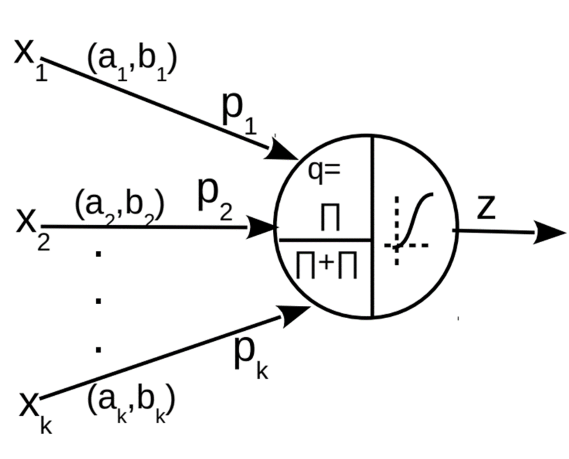

Basado en el modelo mutiplicativo de neurona, el perceptron belated (ABBANN) toma varias **entradas** $x_1, x_2,..., x_n$ dónde $x_k\in[0,1]$ y $k \in \{1,2,...n\}$. Despues de un proceso interno de 3 funciones (sinapsis, agregacion y activacion) produce una **salida** $z$ dónde $z\in[0,1]$. 

## **2 La función sináptica belated**

La función de **sinapsis** consiste en calcular las **señales** $p_1, p_2,..., p_n$ de todas las entradas a la neurona, para ello disponemos de las **entradas** $x_1, x_2,..., x_n $ donde vamos a usar el **índice** $k$ para cada una de un total de las $n$ **señales** a considerar para el cálculo de cada señal de entrada. $a$ y $b$ actuan cómo pesos para entrenar la funcion sináptica.

$$p_k=(b_k-a_k)\cdot x_k+a_k$$

De esta ecuacion lineal, podemos deducir lo siguiente:

$$\left \{
\begin{array}{l}
p_k=a_k\Rightarrow x_k=0\\
p_k=b_k\Rightarrow x_k=1\\
a_k=0,b_k=1\Rightarrow p_k=x_k\\
a_k=\frac{1}{2},b_k=\frac{1}{2}\Rightarrow p_k=\frac{1}{2}\\
\end{array}
\right.$$

Dónde las 2 ultimas se indican los pesos para la sinapsis identidad y sinapsis neutra.

In [ ]:
#Dado el vector aleatorio de entrada x
import matplotlib.pyplot as plt
import numpy as np
x = np.random.uniform(low=0, high=1, size=(10,))
x

array([0.32441212, 0.6748717 , 0.07090513, 0.96464298, 0.91361119,
       0.06186656, 0.69706876, 0.17265105, 0.8967955 , 0.33938724])

In [ ]:
#Calculamos el vector de señales p con los pesos a y b
def sinapsis(x,a=0.0,b=1.0):
  p=((b-a)*x)+a
  return p

p=sinapsis(x)
p

array([0.32441212, 0.6748717 , 0.07090513, 0.96464298, 0.91361119,
       0.06186656, 0.69706876, 0.17265105, 0.8967955 , 0.33938724])

## **3 La función de agregación belated**

La funcion de **agregacion** consiste en agregar la información de las señales $(p_1,p_2,...,p_k)$. Esta agregación deriva del modelo multiplicativo de neurona. De todas las señales se debe obtener un valor $q \in [0,1]$

$$q={\frac{\displaystyle\prod_{k=1}^{n}p_k}{\displaystyle\prod_{k=1}^{n}p_k+\displaystyle\prod_{k=1}^{n}(1-p_k)}}$$





In [ ]:
#Usamos numpy para calcular el producto del vector p sobre su eje por defecto (la funcion no se optimiza para que sea comprensible)
def agregate(p):
  q = np.prod(p) / (np.prod(p) + np.prod(1.0 - p))
  return q

q = agregate(p)
q


0.7562585525930503

## **4 Criterios para la función de activación belated**
Los criterios de conveniencia para definir la función de activación belated son los siguientes:
>$$K>1 \quad \therefore \quad f(0,K)(0)=0 \qquad f(1,K)(1)=1 \qquad  f(\frac{1}{2},K)=\frac{1}{2}$$
$$K>1 \quad \therefore \quad \frac{\partial f(0,K)}{\partial x}=0 \qquad \frac{\partial f(1,K)}{\partial x}=0$$
Sea $f(x,K)$ una función monotona no decreciente
$$f:\mathbb{R},\mathbb{R}\rightarrow\mathbb{R} \quad x,y\in[0,1] \quad K>1 \quad \therefore \quad x \le y \Rightarrow f(x,K) \le f(y,K)$$
Sea $f(x,K)$ una función continua. 
$$K>1 \quad \forall\varepsilon>0 \quad \exists \delta \quad \therefore \quad |x-x_0|<\delta \Rightarrow |f(x,K)-f(x_o,K)|<\varepsilon$$

$$x \in [0,1] \quad \exists c \quad \therefore \quad \lim_{x \to c} f(x)=f(c)$$

Sea $f(x,K)$ derivable
$$K>1 \quad \forall x \in[0,1] \quad \exists {f}'(x,K) \quad \therefore \quad {f}'(x,K)=\frac{\partial f(x,K)}{\partial x}=\lim\limits_{\partial \to 0}\frac{f(x+\partial,K)-{f}(x,K)}{\partial}$$
$f(x,K)$ posea pendiente regulable con factor $K>1$

### **La función de activación belated**
La funcion de activación propuesta es similar a $\sigma(x)$ y que cumple con los requisitos anteriones es exponencial tipo $f(x,K)=x^K$ para el intervalo $q\in[0,1]$

$$K>1 \quad z=f(x,K)=\left \{
\begin{array}{l}
q \in \left[0,\frac{1}{2}\right]\Rightarrow 2^{K-1}q^{K} \\
q \in \left(\frac{1}{2},1\right] \Rightarrow 1-2^{K-1}(1-q)^{K} \\
\end{array}
\right.$$


In [ ]:
#Prueba de la funcion de activacion
K=2
if np.less_equal(q, 0.5):
  z = np.power(2, K-1)*np.power(q, K)
else:
  z = 1 - (np.power(2, K-1))*np.power(1-q, K)
z

0.8811802136319303

La derivada parcial de la funcion de activacion seria la siguiente:

$$K>1 \quad \frac{\partial f(q,K)}{\partial q}=\left \{
\begin{array}{l}
q \in \left[0,\frac{1}{2}\right]\Rightarrow 2^{K-1}Kq^{K-1} \\
q \in \left(\frac{1}{2},1\right] \Rightarrow K2^{K-1}(1-q)^{K-1} \\
\end{array}
\right.$$


In [ ]:
#Prueba de la funcion derivada de activacion
K=2
if np.less_equal(q, 0.5):
  dq = np.power(2, K-1)*K*np.power(q, K-1)
else:
  dq = K*(np.power(2, K-1))*np.power(1-q, K-1)
dq

0.9749657896277988

Vemos el comprotamiento de la funcion de activación

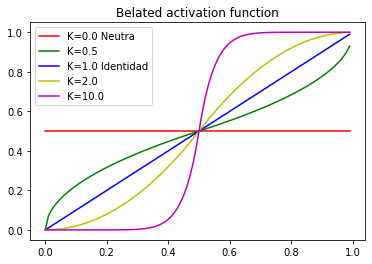

In [ ]:
def activate(q,K=0.5):
  if np.less_equal(q, 0.5):
    z = np.power(2.0, K-1.0)*np.power(q, K)
  else:
    z = 1 - (np.power(2.0, K-1.0)*np.power(1.0-q, K))
  return z

#Valores de 0 a 1
xar = np.arange(0.0, 1.0, 0.01)
x0 = xar*0.0
y0 = list(map(activate,xar,x0))
y1 = list(map(activate,xar,x0+1.0))
y05 = list(map(activate,xar,x0+0.5))
y2 = list(map(activate,xar,x0+2.0))
y10 = list(map(activate,xar,x0+10.0))

plt.plot(xar, y0, color='r', label="K=0.0 Neutra")
plt.plot(xar, y05, color='g', label="K=0.5")
plt.plot(xar, y1, color='b', label="K=1.0 Identidad")
plt.plot(xar, y2, color='y', label="K=2.0")
plt.plot(xar, y10, color='m', label="K=10.0")
plt.title("Belated activation function")
plt.legend()
plt.show()

Veamos el comportamiento de la derivada de la funcion de activacion:

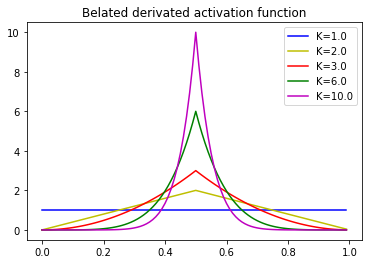

In [ ]:
def deltaactivate(q,K=0.5):
  if np.less_equal(q, 0.5).astype(int):
    dq = np.power(2.0, K-1)*K*np.power(q, K-1.0)
  else:
    dq = K*(np.power(2.0, K-1.0))*np.power(1.0-q, K-1.0)
  return dq 

#Valores de 0 a 1
xar = np.arange(0.0, 1.0, 0.01)
#Necesitamos de un vector 0 del mismo tamaño que x
x0 = xar*0.0

#Asignamos la funcion a cada uno de lo valores del vector
y1 = list(map(deltaactivate,xar,x0+1))
y2 = list(map(deltaactivate,xar,x0+2))
y3 = list(map(deltaactivate,xar,x0+3))
y6 = list(map(deltaactivate,xar,x0+6))
y10 = list(map(deltaactivate,xar,x0+10))

plt.plot(xar, y1, color='b', label="K=1.0")
plt.plot(xar, y2, color='y', label="K=2.0")
plt.plot(xar, y3, color='r', label="K=3.0")
plt.plot(xar, y6, color='g', label="K=6.0")
plt.plot(xar, y10, color='m', label="K=10.0")
plt.title("Belated derivated activation function")
plt.legend()
plt.show()

## **5 Consolidación de las funciones neurales**
Consolidando as 3 funciones de sinapsis, agragacion y activacion, obtenemos el modelo basico de perceptron belated.

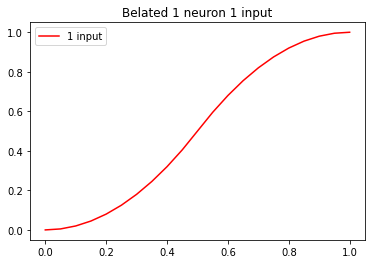

In [ ]:
def belated(x,a=0.0,b=1.0,K=2.0):
  p = sinapsis(x,a,b)
  q = agregate(p)
  z = activate(q,K)
  return z
  
#Valores de 0 a 1
xar = np.arange(0.0, 1.05, 0.05)
aar = np.arange(0.0, 1.05, 0.05)

#X=np.mgrid[0:1.05:0.5, -0:1.05:0.05].reshape(2,-1).T
#Salidas para una neurona y una entrada x
yar=list(map(belated,xar))

#Mostramos los datos
plt.plot(xar, yar, color='r', label="1 input")
plt.title("Belated 1 neuron 1 input")
plt.legend()
plt.show()


## **6 La funcion de pérdida belated**
La funcion de perdida propuesta para el modelo es la siguiente
$$ E(z,t)=|z-t|=\sqrt{\sum_{k}(z_k-t_k)^2 }$$
Dónde $z$ es la salida del perceptron belated para una entrada $x$ y $t$ es el valor de muestra que deberia tener para ese $x$ y $k$ es el indice....

In [ ]:
def error(z,t):
  E=np.sqrt(np.power(z-t,2.0))
  #E=np.abs(z-t)
  return E

x = np.random.uniform(low=0.0, high=1.0, size=(1,))
t = x/2.0
z = belated(x,0.0,1.0,2.0)
E = error(z,t)
[x,t,z,E]

[array([0.92220667]),
 array([0.46110333]),
 0.9878963943458191,
 array([0.52679306])]

## **7 Intuición del proceso de aprendizaje**
El proceso de aprendizaje de una neurona consiste en:
* Exponerla a una entrada $x$
* Extraer la salida de la neurona $z$
* Con el valor esperado de entrenamiento $t$, calculamos el error $E$.
* Dependiendo del error, se puede asumir o usarlo para aplicar correcciones a los pesos $a$ y $b$.

Vamos a entrenar una neurona simple para calcular una proporción.

Para visualizarlo se ha fabricado este ejemplo para converger en 6 pasos, usamos $f(x)=\frac{x}{2}$ como modelo en el punto $0.8$.

La idea es encauzar la convergencia de la neurona hacia un entrenamiento con un error $E < 0.0001$. 

El valor esperado de salida una vez entrenada la neurona es $0.4$. 

Para corregir los pesos se ha usado la mitad del error $\frac{E}{2}$, asumiendo que $E$ desciende disminuyendo progresivamente $a$ y $b$

Epoch:  0 abxtzE [1, 1, 0.8, 0.4, 1.0, 0.6] 

Epoch:  1 abxtzE [0.7, 0.7, 0.8, 0.4, 0.82, 0.41999999999999993] 

Epoch:  2 abxtzE [0.49, 0.49, 0.8, 0.4, 0.48019999999999996, 0.08019999999999994] 

Epoch:  3 abxtzE [0.4499, 0.4499, 0.8, 0.4, 0.40482002000000006, 0.004820020000000036] 

Epoch:  4 abxtzE [0.44748999, 0.44748999, 0.8, 0.4, 0.4004945823004002, 0.0004945823004001704] 

Epoch:  5 abxtzE [0.44724269884979995, 0.44724269884979995, 0.8, 0.4, 0.4000520633489057, 5.206334890567321e-05] 

Neurona entrenada: E= 5.206334890567321e-05 

Verificacion: xtzE  [0.8, 0.4, 0.4000520633489057, 5.206334890567321e-05] 



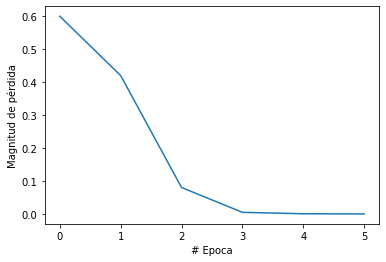

In [ ]:
#Pesos iniciales
a = 1
b = 1
K = 2.0
loss=[]
#Noción de entrenamiento con correccion básica a=a-E/2 y b=b-E/2
for i in range(20):
  #Entrada única y test para entrenar e inferir f(x)=x/2
  x = 0.8
  t = x/2
  
  #Evaluar una salida y su error
  z = belated(x,a,b)
  E = error(z,t)
  loss.append(E)
  print("Epoch: ",i,"abxtzE",[a,b,x,t,z,E],"\n")

  #Evaluar la condicion de parada
  if E < 0.0001:
    print("Neurona entrenada: E=", E,"\n")
    break

  #Corregir los pesos mediante método poco fiable de descenso de gradiente,
  #pero válido para un punto y su proporción
  a=a-E/2
  b=b-E/2
  
#Ver lo que ha aprendido la neurona
x = 0.8
t = x/2
z = belated(x,a,b)
E = error(z,t)
print("Verificacion: xtzE ",[x,t,z,E],"\n")

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(loss)
plt.show()

## **8 Factor de aprendizaje belated**
Este factor $\eta$ ayuda a controlar el aprendizaje en base a la saturacion de la función de agragación y su salida $p$. Se define el factor de aprendizaje belated:
$$\eta=\lim_{n\to\infty}\frac{p^n}{p^n+(1-p^n)}=\left \{
\begin{array}{l}
p \in \left[0,\frac{1}{2}\right)\Rightarrow 0\\
p=\frac{1}{2}\Rightarrow \frac{1}{2}\\
p \in \left(\frac{1}{2},1\right]\Rightarrow 1\\
\end{array}
\right.$$


In [ ]:
def learnfactor(p):
  if np.less(p, 0.5):
    eta=0.0
  if np.greater(p, 0.5):
    eta=1.0
  else:
    eta=0.5
  return eta

eta=learnfactor(0.4)
eta

0.5

## **9 El proceso de aprendizaje belated**
El proceso de aprendizaje nos va ayudar a optimizar el comportamiento del perceptron y a minimizar el error, esta basada en iteraciones con los datos de entrenamiento y la funcion pérdida ó error. Para ello se establece una correccion de los pesos $a$ y $b$ de la funcion sináptica conforme a la pérdida o error $E$:
$$\Delta a_{jk}^{\tau}=-\eta E^\tau \frac{\partial E^{\tau}}{\partial a_{jk}^{\tau}} \quad \Delta b_{jk}^{\tau}=-\eta E^\tau \frac{\partial E^{\tau}}{\partial b_{jk}^{\tau}}\quad$$
Dónde $\eta \in[0,1]$ es el factor de aprendizaje visto y $\tau$ es un indice de orden en la evaluacion y procesamiento de la neurona, en redes de neuronas. Una vez calculado la variacion de aprendizaje se ajustan los pesos en la neurona para la proxima evaluacion.
$$a_{jk}^{\tau+1}=a_{jk}^{\tau} + \Delta a_{jk}^{\tau} \quad b_{jk}^{\tau+1}=b_{jk}^{\tau} + \Delta b_{jk}^{\tau} $$

Las derivadas parciales se calculan considerando $\delta$ como una pequeña variación en la funcion de error $E$

$$\frac{\partial E}{\partial a} = \frac{E_{a+\delta}-E}{\delta} \quad \frac{\partial E}{\partial b} = \frac{E_{b+\delta}-E}{\delta}$$

Vamos a entrenar de nuevo una neurona simple para calcular una proporción. Aqui se puede apreciar que nos hace falta una inercia

Stop epoch  46  with E= [6.13887357e-05]
[46, array([0.19465781]), array([0.51234351]), array([0.75428124]), array([0.37714062]), 0.3772020088348804, array([6.13887357e-05])]


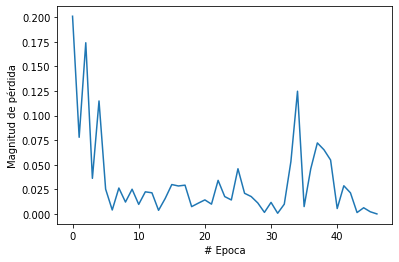

In [ ]:
#Proceso de aprendizaje belated
#Pesos y delta iniciales
a = np.random.uniform(low=0.0, high=1.0, size=(1,))
b = np.random.uniform(low=0.0, high=1.0, size=(1,))
K = 2.0
d = 0.000000001
loss = []

#Entrenamiento con correccion belated para regresion lineal
for i in range(8000):
  #Entrada y test para entrenar e inferir f(x)=x/2
  x = np.random.uniform(low=0, high=1, size=(1,))
  t = x/2
  #Evaluar una salida y su error
  #Descomponemos z = belated(x,a,b) para calcular eta en base a la agragacion
  p = sinapsis(x,a,b)
  q = agregate(p)
  eta = learnfactor(p)
  z = activate(q,K)
  E = error(z,t)
  loss.append(E)
  #Evaluar condicion de parada si se desea que termine si el E < 0.0001
  if E < 0.0001:
    print("Stop epoch ",i," with E=", E)
    break
  #Variar los pesos con delta y extraer el error de la perturbacion
  dza = belated(x,a+d,b)
  Edza = error(dza,t)
  dzb = belated(x,a,b+d)
  Edzb = error(dzb,t)
  #Derivada parcial respecto a delta
  dEda=(Edza-E)/d
  dEdb=(Edzb-E)/d
  #Calculamos Delta,la derivada parcial combinada con el error y el factor eta
  Da=-eta*E*dEda
  Db=-eta*E*dEdb
  #Corregir los pesos con "los deltas"
  a=a+Da
  b=b+Db
  #print([a,b,x,t,z,E,dza,Edza,dzb,Edzb,dEda,dEdb,Da,Db],"\n")

#Ver parametros obtenidos
print([i,a,b,x,t,z,E])
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(loss)
plt.show()

Vamos a probar a añadir un factor de inercia a la variacion de los pesos, considerando que:

$$m \in [0,1] \quad \Delta a_{jk}^{(-1)}=\Delta b_{jk}^{(-1)}=0$$


$$\Delta a_{jk}^{\tau}=-\eta E^\tau \frac{\partial E^{\tau}}{\partial a_{jk}^{\tau}}+m\Delta a_{jk}^{(\tau-1)} \quad \Delta b_{jk}^{\tau}=-\eta E^\tau \frac{\partial E^{\tau}}{\partial b_{jk}^{\tau}}+m\Delta b_{jk}^{(\tau-1)}$$


Stop epoch  93  with E= [6.49495535e-05]
[93, array([0.17118224]), array([0.51114489]), array([0.8613593]), array([0.43067965]), 0.43061470287895465, array([6.49495535e-05])]


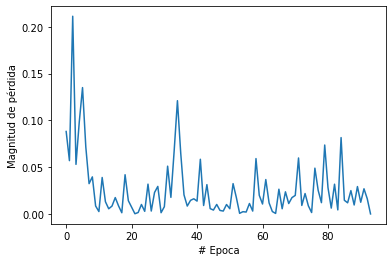

In [ ]:
#Proceso de aprendizaje belated con irnecia
#Pesos y delta iniciales
a = np.random.uniform(low=0.0, high=1.0, size=(1,))
b = np.random.uniform(low=0.0, high=1.0, size=(1,))
K = 2.0
d = 0.000000001
loss = []

#La inercia inicial es 0
m = 0.001
Dat1 = 0
Dbt1 = 0

#Entrenamiento con correccion belated para regresion lineal
for i in range(1000):
  #Entrada y test para entrenar e inferir f(x)=x/2
  x = np.random.uniform(low=0, high=1, size=(1,))
  t = x/2
  #Evaluar una salida y su error
  #Descomponemos z = belated(x,a,b) para calcular eta en base a la agragacion
  p = sinapsis(x,a,b)
  q = agregate(p)
  eta = learnfactor(p)
  z = activate(q,K)
  E = error(z,t)
  loss.append(E)
  #Evaluar condicion de parada si se desea que termine si el E < 0.0001
  if E < 0.0001:
    print("Stop epoch ",i," with E=", E)
    break
  #Variar los pesos con delta y extraer el error de la perturbacion
  dza = belated(x,a+d,b)
  Edza = error(dza,t)
  dzb = belated(x,a,b+d)
  Edzb = error(dzb,t)
  #Derivada parcial respecto a delta
  dEda = (Edza-E)/d
  dEdb = (Edzb-E)/d
  #Calculamos Delta,la derivada parcial combinada con el error y el factor eta
  Da = -eta*E*dEda
  Db = -eta*E*dEdb
  #Corregir los pesos con "los deltas", la inercia y los deltas de tau-1
  a = a + Da + (m * Dat1)
  b = b + Db + (m * Dbt1)
  #Guardamos para su uso en tau+1
  Dat1 = a
  Dbt1 = b
  #print([a,b,x,t,z,E,dza,Edza,dzb,Edzb,dEda,dEdb,Da,Db],"\n")

#Ver parametros obtenidos
print([i,a,b,x,t,z,E])
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(loss)
plt.show()

## **Una red para una regresion lineal**
WIP   TODO 
Para comprobar el funcionamiento del una red neuronal belated vamos a usar una red neuronal de 4 capas y 4 neuronas para inferir en base al entrenamiento la funcion lineal $f(x)=2x+30 $ , para ello escogeremos un set de datos entrenamiento con los puntos de esta funcion para entrenar a al neurona. Los datos deben de estar normalizados en $[0,1]$. Una vez entrenada podremos ver si el comportamiento lineal es adecuado.

In [ ]:
import numpy as np
from numpy.random import uniform as u

class BelatedNeuralNet:

  def __init__(self, n_layers=1, n_neurons=4, n_inputs=1, n_outputs=1):
    # Definimos la temperatura K general
    self.K=2.0
   
    # Definimos pesos en la capa de entrada
    self.a_in = u(low=0,high=1, size=(n_inputs, n_neurons)) 
    self.b_in = u(low=0,high=1, size=(n_inputs, n_neurons))
    # Definimos pesos en las capas ocultas
    self.a_hidden = u(low=0,high=1, size=(n_layers, n_neurons, n_neurons))
    self.b_hidden = u(low=0,high=1, size=(n_layers, n_neurons, n_neurons))
    # Definimos pesos en las capas de salida
    self.a_out = u(low=0,high=1, size=(n_neurons, n_outputs)) 
    self.b_out = u(low=0,high=1, size=(n_neurons, n_outputs))

  @staticmethod

  def sinapsis(x,a=0.0,b=1.0):
    p=((b-a)*x)+a
    return p

  def agregate(p):
    q = np.prod(p) / (np.prod(p) + np.prod(1.0 - p))
    return q

  def activate(q,K=0.5):
    if np.less_equal(q, 0.5).astype(int):
      z = np.power(2.0, K-1.0)*np.power(q, K)
    else:
      z = 1 - (np.power(2.0, K-1.0)*np.power(1.0-q, K))
    return z

  def error(z,t):
    E=np.sqrt(np.power(z-t,2.0))
    return E

  def learnfactor(p):
    if np.less(p, 0.5):
      eta=0.0
    if np.greater(p, 0.5):
      eta=1.0
    else:
      eta=0.5
    return eta

  def activate_layer(self, y_in, a, b):
    p = sinapsis(y_in,a,b)
    q = agregate(p)
    eta = learnfactor(q)
    z = activate(q,K)
    E = error(z,t)
    #loss.append(E)
    return z

  def printnetwork(self):
    print("IN a", self.a_in,"\nIN b", self.b_in,"\n")
    for i in range(self.a_hidden.shape[0]):
      print("L",i," a",self.a_hidden[i],"\nL",i," b", self.b_hidden[i],"\n")
    print("OUT b",self.a_out,"\nOUT b", self.b_out,"\n")
  
  def feedforward(self, y_in):
    y = self.activate_layer(y_in, self.a_in, self.b_in)
    for i in range(self.a_hidden.shape[0]):
      y = self.activate_layer(y, self.a_hidden[i], self.b_hidden[i])
    output = self.activate_layer(y, self.a_out, self.b_out)
    return output


#TODO algoritmo de error y back propagation
bnn=BelatedNeuralNet()
y_in = np.array([0.8])
out=bnn.feedforward(y_in)
bnn.printnetwork()
out

IN a [[0.86920819 0.40851125 0.63862545 0.95153473]] 
IN b [[0.85457185 0.5402882  0.59921339 0.80891842]] 

L 0  a [[0.08507046 0.59477453 0.41826928 0.39525878]
 [0.59532822 0.28881979 0.83222047 0.50819525]
 [0.11193752 0.75323212 0.76805174 0.14859787]
 [0.8803687  0.79231622 0.85076806 0.92253478]] 
L 0  b [[0.4229872  0.59677327 0.75750456 0.84700711]
 [0.10177357 0.46424085 0.59167612 0.23278382]
 [0.3221451  0.76580174 0.06063994 0.09433266]
 [0.73811861 0.20048929 0.33732642 0.6572311 ]] 

OUT b [[0.13400814]
 [0.72433087]
 [0.45839854]
 [0.04068039]] 
OUT b [[0.86618688]
 [0.86175937]
 [0.43597758]
 [0.68779554]] 



0.00041509243300222505

Ahora creamos un vector de entrada con valores aleatorios, que utilizaremos para validar el funcionamiento de nuestra red neuronal.

## **La funcion K-sigmoide**
Para la funcion de activacion sigmoide $\sigma(x)$ se puede proponer un factor que se añade a la funcion sigmoide para parametrizar la pendiente de la curva.  

$$\sigma_K(x,K)=\frac{1}{1+e^{K\cdot(-x)}}$$

Podemos visualizar los efectos del factor $K$ en la funciona K-sigmoide.

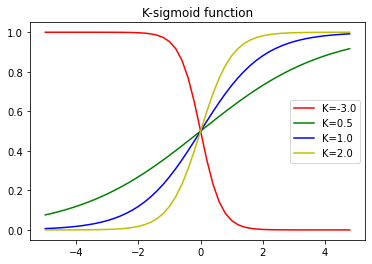

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def ksigmoid(K, x):
    return 1.0/(1.0+np.exp(K*(-x)))

x = np.arange(-5.0, 5.0, 0.2)
ym3 = ksigmoid(-3, x)
y1 = ksigmoid(1, x)
y05 = ksigmoid(0.5, x)
y2 = ksigmoid(2, x)
plt.plot(x, ym3, color='r', label="K=-3.0")
plt.plot(x, y05, color='g', label="K=0.5")
plt.plot(x, y1, color='b', label="K=1.0")
plt.plot(x, y2, color='y', label="K=2.0")
plt.title("K-sigmoid function")
plt.legend()
plt.show()


## **Inestabilidad**
**TODO**
En redes neuronales que esten basadas en topologias recurrencias puede darse problemas de inestabilidad y no ocurra la convergencia de la red.
Se define la siguiente funcion de inestabilidad definiendo $\tau$ como un indice de ordenación de evaluacion de las neuronas
$$I=\sqrt{\sum_{i}(z_i^{(\tau+1)}-z_i^{(\tau)})^2}$$